===== Model: text-curie-001 =====
Output tokens: 220
Total Time: 2.14 s
Tokens per second: 102.59
===== Model: text-babbage-001 =====
Output tokens: 79
Total Time: 0.83 s
Tokens per second: 94.81
===== Model: text-ada-001 =====
Output tokens: 155
Total Time: 1.05 s
Tokens per second: 147.97
===== Model: text-davinci-002 =====
Output tokens: 225
Total Time: 4.20 s
Tokens per second: 53.54
===== Model: text-davinci-003 =====
Output tokens: 316
Total Time: 23.19 s
Tokens per second: 13.63
===== Model: gpt-3.5-turbo =====
Output tokens: 273
Total Time: 27.55 s
Tokens per second: 9.91
===== Model: gpt-4 =====
Output tokens: 612
Total Time: 127.93 s
Tokens per second: 4.78


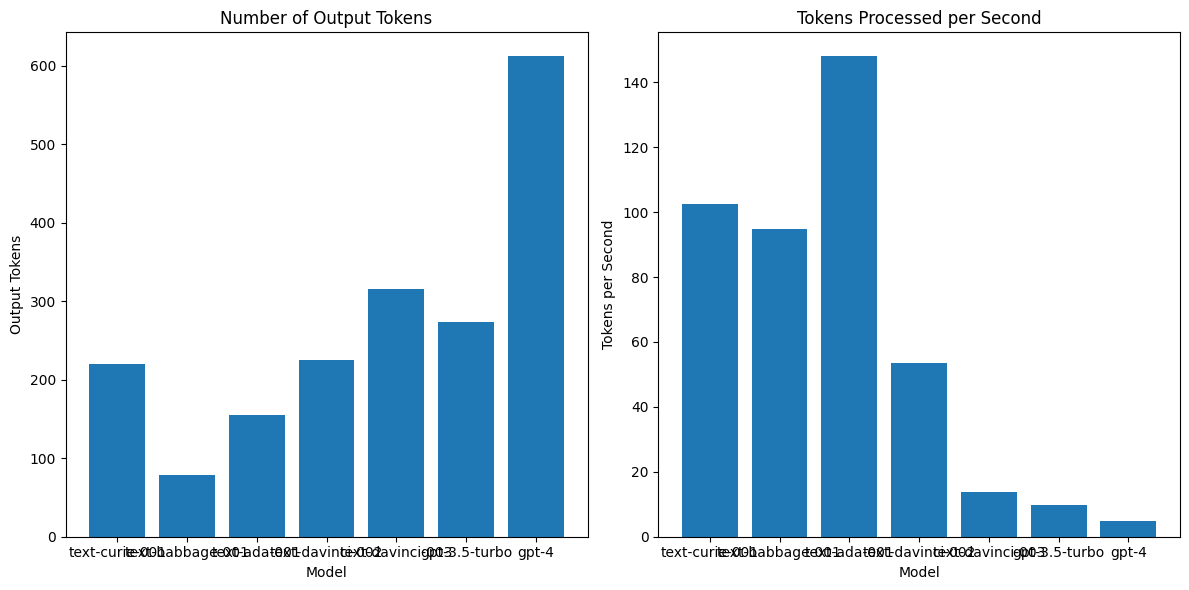

In [12]:
from time import time

import matplotlib.pyplot as plt
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain.schema import HumanMessage
from transformers import GPT2TokenizerFast


def plot_charts(model_names, output_tokens, tokens_per_second):
    # Plotting charts
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(model_names, output_tokens)
    plt.xlabel("Model")
    plt.ylabel("Output Tokens")
    plt.title("Number of Output Tokens")

    plt.subplot(1, 2, 2)
    plt.bar(model_names, tokens_per_second)
    plt.xlabel("Model")
    plt.ylabel("Tokens per Second")
    plt.title("Tokens Processed per Second")

    plt.tight_layout()
    plt.show()


text_models = [
    "text-curie-001",
    "text-babbage-001",
    "text-ada-001",
    "text-davinci-002",
    "text-davinci-003",
]
chat_models = ["gpt-3.5-turbo", "gpt-4"]


def process_model(model_name, chat_model):
    print(f"===== Model: {model_name} =====")

    text = "Question: Tell me a history of WW2 in 3 or 4 paragraphs, include some long descriptions.\nAnswer: "

    if chat_model:
        model = ChatOpenAI(model_name=model_name)
        text = [HumanMessage(content=text)]
    else:
        model = OpenAI(model_name=model_name, max_tokens=-1)

    time0 = time()
    output = model(text)
    elapsed_time = time() - time0

    if chat_model:
        output = output.content

    tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
    token_count = len(tokenizer.encode(output))

    print(f"Output tokens: {token_count}")
    print(f"Total Time: {elapsed_time:.2f} s")
    print(f"Tokens per second: {(token_count / elapsed_time):.2f}")

    return token_count, elapsed_time, token_count / elapsed_time


model_names = []
output_tokens = []
time_taken = []
tokens_per_second = []

for model_name in text_models:
    token_count, elapsed_time, tokens_per_sec = process_model(model_name, False)
    model_names.append(model_name)
    output_tokens.append(token_count)
    time_taken.append(elapsed_time)
    tokens_per_second.append(tokens_per_sec)

for model_name in chat_models:
    token_count, elapsed_time, tokens_per_sec = process_model(model_name, True)
    model_names.append(model_name)
    output_tokens.append(token_count)
    time_taken.append(elapsed_time)
    tokens_per_second.append(tokens_per_sec)

# Plotting charts
plot_charts(model_names, output_tokens, tokens_per_second)